# Bank Marketing Campaign Analysis
#### By : Gieorgie Kharismatik Kosasih

## Business Problem Understanding

### Context 
Jenis produk keuangan yang digunakan masyarakat lebih bervariasi. Salah satu produk keuangan yang cukup dikenal masyarakat adalah term deposit atau deposito berjangka. Mekanisme term deposit adalah nasabah menyimpan sejumlah uang di bank atau lembaga keuangan, dan uang tersebut hanya dapat ditarik setelah jangka waktu tertentu. Sebagai kompensasinya, nasabah akan diberikan bunga tetap sesuai dengan nominal uang yang disetorkan.

Namun demikian, sebagai badan usaha dengan produk keuangan dan nasabahnya masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan Marketing Camapaign.

Target :

0 : Tidak menabung deposito

1 : Menabung deposito


#### Pernyataan masalah 
Proses marketing produk bank dalam hal ini Deposito dapat memakan waktu dan menyebabkan biaya marketing membengkak jika perusahaan melakukan cara pendekatan yang sama kepada setiap nasabah yang ada. Tentu perusahaan ingin menigkatkan nasabah yang menggunakan deposito akan tetapi jika pendekatan yang dilakukan kepada setiap nasabah sama akan memakan waktu dan biaya sehingga keuntungan yang di hasilkan tidak maksimal atau dengan kata lain efisiensi marketing sangat buruk 

Oleh karena itu perusahaan ingin adanya kemampuan untuk memprediksi nasabah yang berpotensial 

#### Goals :
Berdasarkan pernyatan di atas perusahaan ingin memanfaatkan data yang ada untuk dapat memiliki kemampuan naasabah mana yang akan melakukan deposit sehingga dapat melakukan pendekatan yang lebih baik

#### Analtic Approach :
Untuk dapat mencapai tujuan tersebut kita akan memanfaatkan data yang ada untuk di analisa dan menemukan pola nasabah yang melakukan deposit atau tidak
kemudian membangun model klasifikasi yang dapat berguna bagi perusahaan untuk menemukan nasabah potensial

#### Metric Evaluation
Type 1 error : False Positive (Nasabah yang aktualnya tidak menabung deposito tetapi terprediksi ingin menabung deposito)
Konsekuensi: kerugian biaya dalam telemarketing, serta jika nasabah di lakukan pendekatan terus menerus akan membuat nasabah menjadi tidak nyaman

Type 2 error : False Negative (Nasabah yang aktualnya ingin menabung deposito tetapi terprediksi tidak ingin menabung deposito)
konsekuensi:  kehilangan nasabah potensial yang ingin menabung deposit

Berdasarkan konsekuensinya, maka semaksimal mungkin yang kita lakukan adalah membuat model yang mengurangi False Negatif serta dapat memberikan probabilitas yang membantu divisi marketing bank untuk lebih baik dalam menentukan nasabah yang akan di dekati.
Metrik utama yang akan digunakan dalam membantu menyelesaikan masalah ini adalah Recall 

## Data Understanding

In [357]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


### Kolom yang terdapat pada data set 


**Informasi demografi nasabah**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Age |Integer | age of client |
|Job |Text | type of job  |
|Housing |Text | has housing loan? |
|Loan |Text | has personal loan? |

**Informasi terkait campaign saat ini**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Contact |Text | contact communication type  |
|Month |Text | last contact month of year  |
|Campaign |Integer | number of contacts performed during this campaign and for this client |

**Informasi terkait campaign sebelumnya**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Pdays |Integer | pdays: number of days that passed by after the client was last contacted from a previous campaign |
|Poutcome |Text | poutcome: outcome of the previous marketing campaign  |

**Target**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Deposit |Text | has the client subscribed a term deposit? |

In [358]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Mari kita liat informasi singkat yang terdapat dalam data set

In [359]:
print('Pada data terdapat jumlah baris dan kolom :',df.shape)
df.info()

Pada data terdapat jumlah baris dan kolom : (7813, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [360]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Mari kita cek apakah dalam data set terdapat data kosong 

<AxesSubplot: >

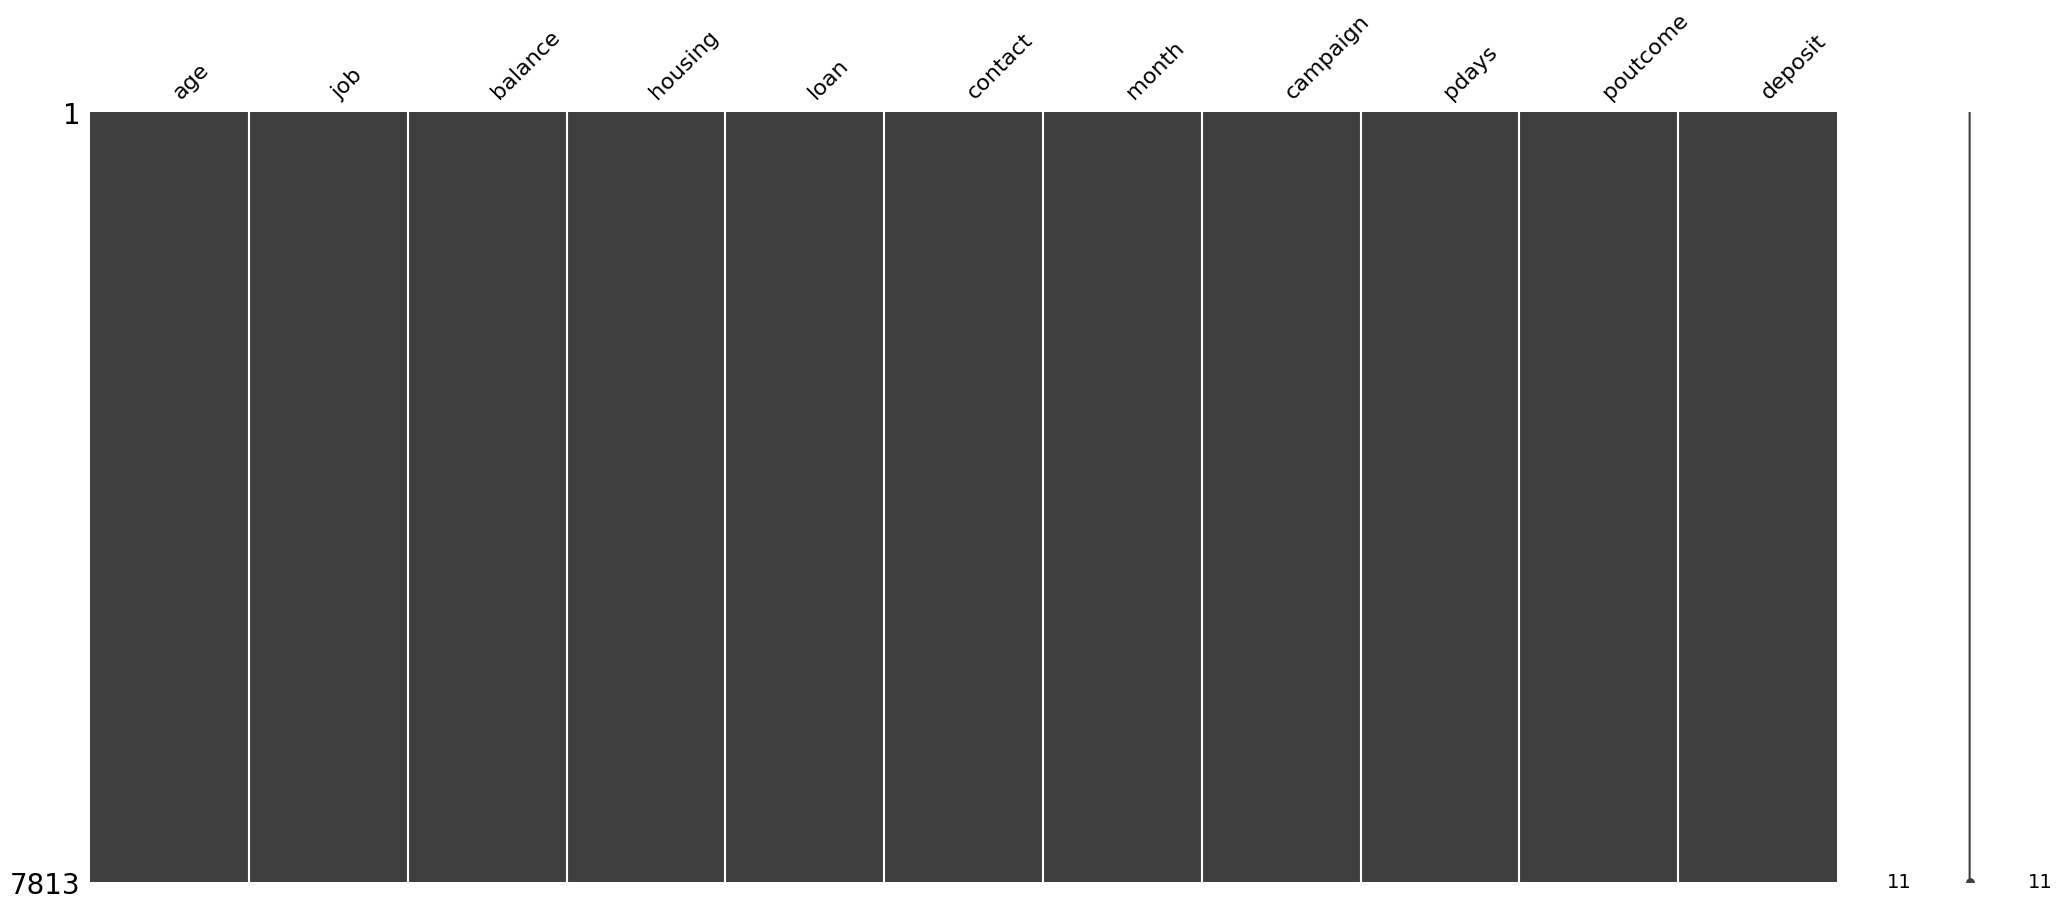

In [361]:
msno.matrix(df)

Berdasarkan plot di atas tidak ditemukannya data kosong.
Sekarang kita lanjutkan untuk mengecek apa ada duplikasi dalam data.

In [362]:
df[df.duplicated()] 

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Terdapat duplikasi dalam data.
Duplikasi yang kita temukan sebenarnya bisa saja tidak di buang mengingat tidak ada label data pembeda dari setiap nasabah. Tapi karena duplikasi yang di temukan hanya sedikit penulis akan memlih untuk membuang duplikasi data tersebut

In [363]:
df.drop_duplicates(inplace=True)

Sekarang kita akan melakukan check setiap value yang terdapat di kolom dataset untuk lebih memahami data

In [364]:
val =[]
for col in df.columns :
    val.append([col,df[col].dtype,df[col].nunique(),list(df[col].drop_duplicates().values)])

dfunique = pd.DataFrame(columns=['Fitur','DataType','JumlahValue', 'UniqueValue'],data=val)
dfunique

,Fitur,DataType,JumlahValue,UniqueValue
0,age,int64,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,"[no, yes]"
4,loan,object,2,"[no, yes]"
5,contact,object,3,"[cellular, telephone, unknown]"
6,month,object,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,"[unknown, other, failure, success]"


Berdasarkan tabel di atas di dapat informasi:
1. Pada kolom pdays ada value (-1) pdays adalah jumlah hari sejak terakir dihubungi pada kampanye sebelumnya berarti (-1) menandakan customer tidak di hubungi 
2. Pada kolom job, contact, dan poutcome ada value unknown kita akan mengecek setiap kolom tersebut

In [365]:
df['pdays'].value_counts()

-1      5809
 92       80
 91       62
 182      61
 181      56
        ... 
 375       1
 320       1
 373       1
 24        1
 155       1
Name: pdays, Length: 422, dtype: int64

In [366]:
df['job'].value_counts()

management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: job, dtype: int64

Unknown pada kolom job dapat di artikan jenis perkerjaan lain atau berbeda.
kita akan merubah unknown menjadi other

In [367]:
df['job'] = df['job'].replace('unknown', 'other')

In [368]:
df['contact'].value_counts()

cellular     5623
unknown      1636
telephone     546
Name: contact, dtype: int64

Dalam kolom ini terdapat 2 cara pendekatan pada nasabah
Kontak cellular mencakup penggunaan pesan teks, email, pesan instan, dan media sosial untuk berkomunikasi dengan konsumen.
Kontak telephone melibatkan peneleponan langsung ke konsumen potensial dan berbicara dengan mereka secara langsung tentang produk dan layanan bank.
Maka dapat di artikan unknown adalah nasabah yang tidak di kontak.
kita akan merubah unknown menjadi notContacted

In [369]:
df['contact'] = df['contact'].replace('unknown', 'notContacted')

In [370]:
df['poutcome'].value_counts()

unknown    5811
failure     848
success     761
other       385
Name: poutcome, dtype: int64

unknown yang banyak pada poutcome wajar saja terjadi karena keterangan pada kolom pdays customer yang tidak di kontak saja mencapai 5800 orang. jadi dapat didefinisikan unknown pada kolom poutcome adalah customer tidak di hubungi pada kampanye sebelumnya.
kita akan merubah unknown menjadi notContacted

In [371]:
df['poutcome'] = df['poutcome'].replace('unknown', 'notContacted')

Sekarang Kita akan melihat perbandingan jumlah nasabah yang melakukan deposit dan yang tidak, untuk melihat apa terjadi imbalance pada target atau tidak.

In [372]:
df['deposit'].value_counts()

no     4075
yes    3730
Name: deposit, dtype: int64

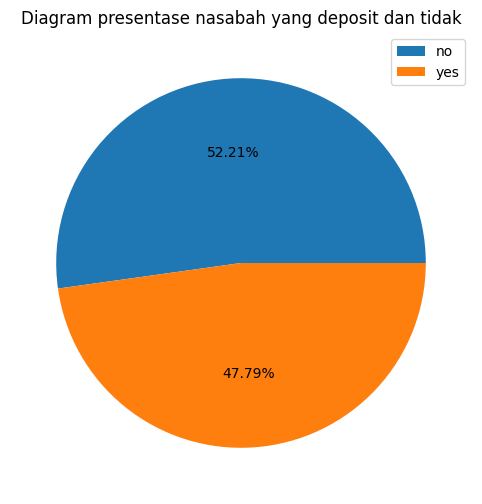

In [373]:
plt.figure(figsize=(8,6))
plt.pie(x=df['deposit'].value_counts(), autopct = '%.2f%%')
plt.title('Diagram presentase nasabah yang deposit dan tidak')
plt.legend((df['deposit'].value_counts()).index)
plt.show()

Dapat di lihat dari diagram di atas bahwa nasabah yang melakukan deposit dan tidak masih dapat dibilang balance dengan proporsi 48 : 52 sehingga tidak perlu melakukan treatment untuk menstabilkan data.

### Outlier

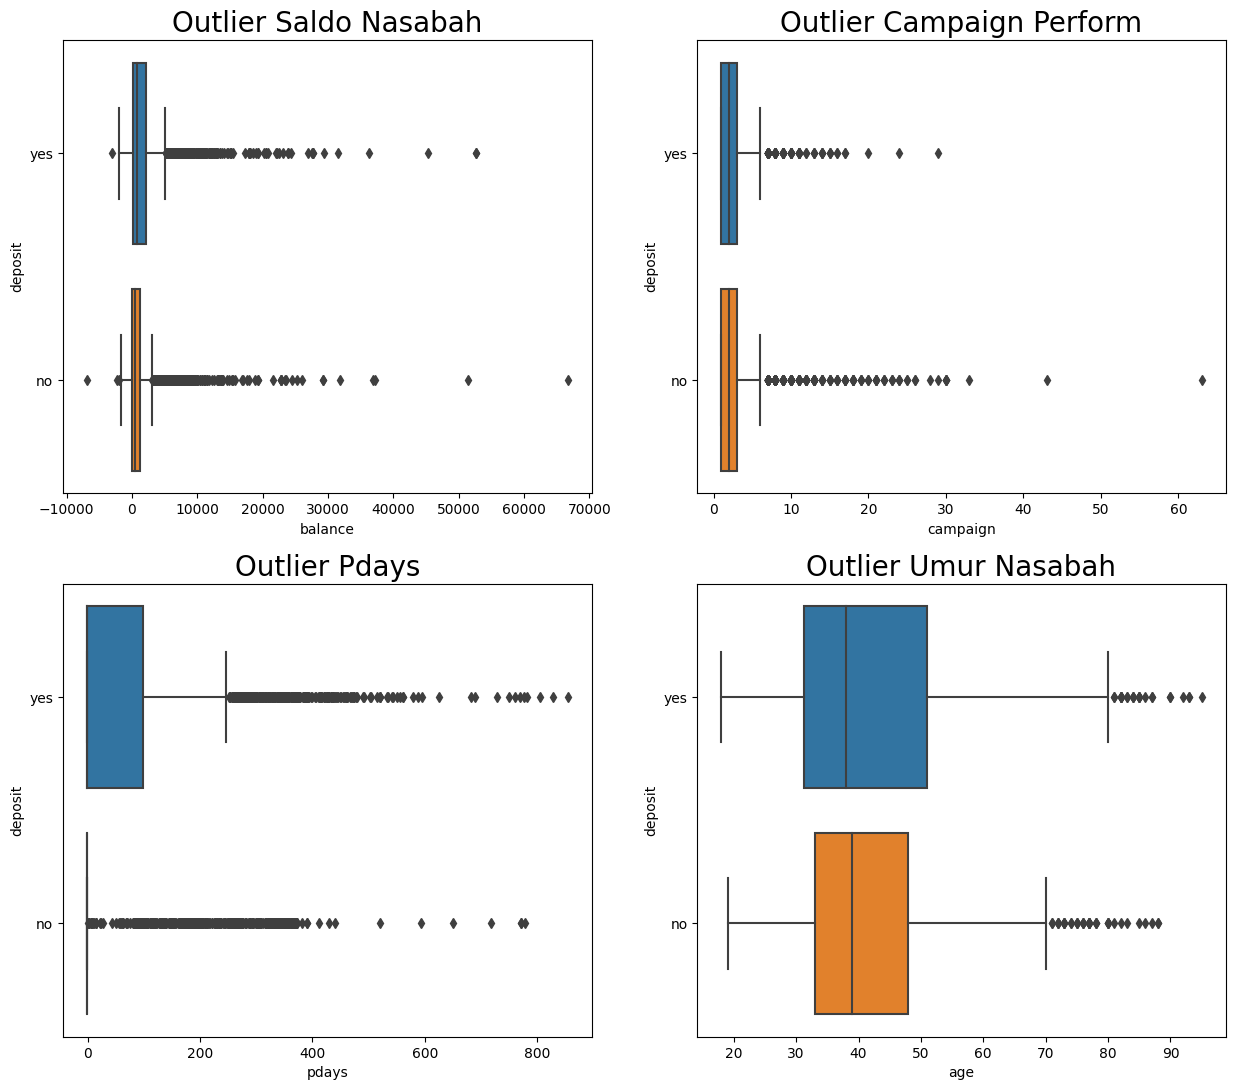

In [374]:
plt.figure(figsize=(15,20))
plt.subplot(321)
sns.boxplot(data=df,x='balance', y='deposit')
plt.title('Outlier Saldo Nasabah',fontsize=20)

plt.subplot(322)
sns.boxplot(data=df, x='campaign', y='deposit')
plt.title('Outlier Campaign Perform',fontsize=20)

plt.subplot(323)
sns.boxplot(data=df, x='pdays', y='deposit')
plt.title('Outlier Pdays',fontsize=20)

plt.subplot(324)
sns.boxplot(data=df, x='age', y='deposit')
plt.title('Outlier Umur Nasabah',fontsize=20)

plt.show()

Dari Diagram di atas didapat adanya outlier di fitur balance, campaign, pdays, dan age. Karena outlier sangat banyak dan berpengaruh dalam target yaitu Deposit maka penulis memutuskan untuk mengabaikan outlier yang ada 

## Data Preparation

In [375]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,notContacted,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,notContacted,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,notContacted,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,notContacted,no


Setelah sudah memahami data dan membersihkan data sekarang kita akan melakukan encoding fitur fitur kategorikal yang ada.

1. Merubah Fitur Job menggunakan binary encoding. bisa juga menggunakan one hot encoding tapi karena variasi value dari fitur ini banyak penulis memutuskan menggunakan binary encoding
2. Merubah fitur housing , loan , Contact dan poutcome menggunakan One Hot Encoding. Karena memiliki variasi value yang tidak berurutan 
3. Merubah fitur Month menggunakan Ordinal Encoding. Karena value menunjukan bulan dan setiap bulan ada di dalam fitur ini dan memiliki lompatan value yang sama.

In [376]:
ordinal_mapping = [
    {'col':'month',
    'mapping':{
        'jan' : 0,
        'feb' : 1,
        'mar' : 2,
        'apr' : 3,
        'may' : 4,
        'jun' : 5,
        'jul' : 6,
        'aug' : 7,
        'sep' : 8,
        'oct' : 9,
        'nov' : 10,
        'dec' : 11,
    }}
]

In [377]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['loan', 'poutcome', 'housing', 'contact']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month']),
    ('binary', ce.BinaryEncoder(), ['job']),
], remainder='passthrough')

In [378]:
x = df.drop(columns=['deposit'])
y = np.where(df['deposit'] == 'yes', 1 ,0)

In [379]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2023)

In [380]:
x_train_preprocessed = transformer.fit_transform(x_train)
x_train_preprocessed

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.230e+02,  1.000e+00,
         6.000e+01],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ...,  0.000e+00,  2.000e+00,
        -1.000e+00],
       [ 1.000e+00,  1.000e+00,  0.000e+00, ...,  0.000e+00,  5.000e+00,
        -1.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.140e+02,  6.000e+00,
         9.000e+01],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ...,  9.750e+02,  2.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.777e+03,  5.000e+00,
         1.540e+02]])

## Modeling & Evaluation

Metric Evaluation yang akan digunakan pada pemodelan ini adalah recall sesuai dengan keperluan bisnis yang ada pada kasus ini.
Recall recall mengukur seberapa banyak positive cases (kasus yang seharusnya diidentifikasi sebagai "yes" atau "1") yang berhasil diidentifikasi dengan benar oleh model. Ketika recall meningkat, artinya model berhasil mengidentifikasi lebih banyak positive cases dengan benar. Hal ini juga berarti jumlah false negative akan menurun, karena model dapat mengidentifikasi lebih banyak positive cases yang seharusnya diidentifikasi sebagai "yes" atau "1". Sebaliknya, ketika recall rendah, artinya model gagal mengidentifikasi banyak positive cases dan memperlihatkan lebih banyak false negative.
Oleh karena itu, recall yang tinggi sangat penting dalam kasus term deposit agar model dapat mengidentifikasi calon pelanggan yang berpotensi tertarik dalam produk term deposit dan menghindari false negative.

In [381]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

### Model Benchmarking K-fold

In [382]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'recall':rata,'sdev':std}).set_index('model').sort_values(by='recall',ascending=False)

,recall,sdev
model,,
Random Forest,0.631703,0.010741
XGBoost,0.623329,0.008449
Logistic Regression,0.616298,0.018104
Decision Tree,0.604896,0.009489
KNN,0.528144,0.016676


Berdasarkan model benchmarking di atas di dapat bahwa model random forest dan xgboost merupakan model yang terbaik jika di lihat dari metrik evaluation Recall.
selanjutnya kita akan melihat model mana yang terbaik di test data

### Model Benchmarking : Test Data

In [383]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    print(j,'\n', classification_report(y_test,y_pred))
    


Logistic Regression 
               precision    recall  f1-score   support

           0       0.64      0.69      0.66       815
           1       0.63      0.58      0.60       746

    accuracy                           0.64      1561
   macro avg       0.64      0.63      0.63      1561
weighted avg       0.64      0.64      0.64      1561

KNN 
               precision    recall  f1-score   support

           0       0.60      0.68      0.64       815
           1       0.59      0.49      0.54       746

    accuracy                           0.59      1561
   macro avg       0.59      0.59      0.59      1561
weighted avg       0.59      0.59      0.59      1561

Decision Tree 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66       815
           1       0.62      0.59      0.60       746

    accuracy                           0.63      1561
   macro avg       0.63      0.63      0.63      1561
weighted avg       0.63      0

Setelah dilakukan modelbenchmarking pada data test di dapat Model XGBoost adalah model terbaik melihat nilai recall yang dihasilkan dari data train dan test sebesar 62 
mengapa tidak memilih random forest sebagai model karena terjadi penurunan dari benchmark train data dan benchmark test data jadi penulis memutuskan menggunakan model xgboost.
mengapa metrik evaluationnya dipilih recall karena sesuai dengan keperluan bisnis dimana perusahaan ingin meminimalisir False negatif (dimana nasabah yang sebenarnya ingin deposit tapi di deteksi tidak deposit.)

## Hyperparameter Tunning

XGBoost (Extreme Gradient Boosting) adalah algoritme machine learning yang sangat efektif untuk pemodelan prediktif dan digunakan dalam berbagai kasus, termasuk prediksi untuk produk term deposit. XGBoost adalah pengembangan dari algoritme Gradient Boosting yang menggunakan multiple decision trees untuk membuat model prediktif yang lebih akurat.
Dalam kasus term deposit, XGBoost dapat digunakan untuk memprediksi apakah seorang pelanggan tertentu akan berinvestasi dalam produk term deposit atau tidak. XGBoost akan belajar dari data pelanggan yang ada untuk membuat model prediktif yang akurat.
XGBoost menggunakan teknik gradient boosting untuk mengoptimalkan multiple decision trees yang digunakan dalam model prediktif. Pada setiap iterasi, XGBoost menambahkan decision tree baru yang fokus pada kasus-kasus yang masih sulit diprediksi oleh model sebelumnya. Kemudian, XGBoost menimbang setiap decision tree berdasarkan kinerjanya dan membuat prediksi akhir berdasarkan gabungan prediksi dari setiap decision tree.

XGBoost memiliki default parameter
n_estimator = 100 , max_depth = 6, learning_rate = 0.3, colsample_bytree = 1

sumber : https://xgboost.readthedocs.io/en/latest/parameter.html

learning_rate : Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting

max_depth : merupakan batas maksimal kedalaman tree

n_estimator : menentukan jumlah decision tree yang akan di bangun pada model semakin tinggi semakin beresiko overfitting

colsample_bytree : menentukan proporsi fitur yang akan digunakan dalam membangun decision tree.

In [384]:
xgb = XGBClassifier()

estimator=Pipeline([
    ('preprocess',transformer),
    ('model',xgb)
])

In [385]:
hyperparam_space=[{
    'model__n_estimators': [100, 200, 250],
    'model__max_depth':[6, 4, 7],
    'model__learning_rate': [0.3, 0.75, 0.5],
    'model__colsample_bytree':[1, 0.5, 0.75]
}]

In [386]:
grid = GridSearchCV(estimator, 
n_jobs=-1, 
param_grid=hyperparam_space, 
scoring='recall', 
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023))

In [387]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)


0.6343940058233
{'model__colsample_bytree': 1, 'model__learning_rate': 0.5, 'model__max_depth': 6, 'model__n_estimators': 200}


setelah melakukan tuning didapat parameter yang lebih baik dibanding default ada 2 yaitu 'model__learning_rate': 0.5, 'model__max_depth': 6, 'model__n_estimators': 200 meski kenaikan yang dihasilkan tidak cukup signifikan

In [388]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['loan', 'poutcome',
                                                   'housing', 'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [389]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['loan', 'poutcome',
                                                   'housing', 'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     0
feb     1
mar     2
apr     3
may     4
jun     5
jul     6
aug     7
sep     8
oct     9
nov    10
dec    11
dtype: int64}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [390]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

In [391]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.69      0.79      0.74       815
           1       0.73      0.62      0.67       746

    accuracy                           0.71      1561
   macro avg       0.71      0.70      0.70      1561
weighted avg       0.71      0.71      0.70      1561

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       815
           1       0.69      0.62      0.65       746

    accuracy                           0.69      1561
   macro avg       0.69      0.68      0.68      1561
weighted avg       0.69      0.69      0.68      1561



berasarkan clasification report di atas hasil recall nilai positif tidak berubah tetapi mengalami sedikit penurunan pada recall nilai negatif sebanyak 2 persen

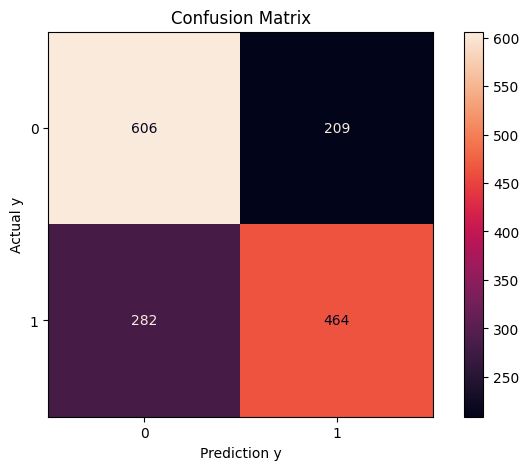

In [392]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test, cmap='rocket', ax=ax)

plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

### Feature Importances

Kita akan melihat Fitur mana yang paling penting untuk model XGboost yang sudah di buat

In [393]:
onehot_cols = list(transformer.transformers_[0][1].get_feature_names_out())
ordinal_cols = list(transformer.transformers_[1][1].get_feature_names())
Binary_cols = list(transformer.transformers_[2][1].get_feature_names_out())
remainder_cols = list(x.columns[transformer.transformers_[3][2]])

feature_name = onehot_cols + ordinal_cols + Binary_cols + remainder_cols


In [394]:
feature_importances = pd.DataFrame({
    'features' : feature_name,
    'importances': best_model['model'].feature_importances_
})

feature_importances.sort_values('importances', ascending=False).head(10)

,features,importances
3,poutcome_success,0.517718
5,contact_notContacted,0.119550
4,housing_yes,0.039532
0,loan_yes,0.035830
6,contact_telephone,0.033317
7,month,0.032055
1,poutcome_notContacted,0.031469
2,poutcome_other,0.025060
15,pdays,0.024189
14,campaign,0.020820


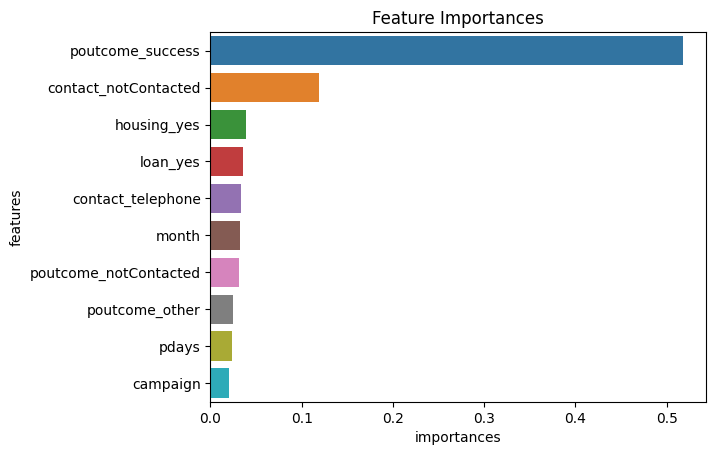

In [395]:
top10_features = feature_importances.sort_values('importances', ascending=False).head(10)

sns.barplot(data = top10_features, y= 'features', x='importances')
plt.title('Feature Importances')


plt.show()

terlihat bahwa pada model fitur yang paling penting terdapat di potcome success di ikuti dengan contact dan housing yes 

## Kesimpulan Dan Saran

In [396]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       815
           1       0.69      0.62      0.65       746

    accuracy                           0.69      1561
   macro avg       0.69      0.68      0.68      1561
weighted avg       0.69      0.69      0.68      1561



Berdasarkan hasil classification report dari model kita, kita dapat mengambil kesimpulan bahwa bila seandainya nanti kita menggunakan model kita untuk menjadi bahan pertimbangan list nasabah yang akan kita coba tawarkan produk deposit, maka model kita dapat mengurangi pendekatan pada 74% nasabah yang tidak tertarik untuk melakukan deposit, dan model kita dapat mendapatkan 62% kandidat nasabah yang tertarik untuk melakukan deposit dari seluruh nasabah yang tertarik berdarsarkan nilai recall yang di dapat.

Model kita ini memiliki ketepatan prediksi nasabah yang tertarik deposit sebesar 69% berdasarkan precision, jadi setiap model kita memprediksi bahwa seorang nasabah itu tertarik melakukan deposit, maka kemungkinan tebakannya benar itu sebesar 69%. Masih akan ada nasabah yang sebenarnya tidak tertarik tetapi diprediksi sebagai nasabah yang tertarik sekitar 38 % dari keseluruhan nasabah yang tidak tertarik berdasarkan nilai recall yang di dapat.

Tentu jika model diterapkan kita dapat mengurangi biaya telemarketing dan dapat mempertimbangan strategi yang tepat untuk mendekati pelanggan.



#### Rekomendasi

Untuk membuat model ini menjadi lebih baik adalah:
- Menambah Fitur yang kemungkinan berpengaruh besar bagi model yang di bangun seperti : apa nasabah memiliki kredit macet atau tidak dan lain lain.

- Melakukan hypeparameter tuning kembali menggunakan oversampling atau pada feature engineer data di seimbangkan menggunakan metode smote dan kemungkinan kemungkinan yang menunjang untuk membuat performa yang lebih baik.